In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr


# For time stamps
from datetime import datetime


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Measles/cameroon.csv', parse_dates= True , index_col= "Year-Month")

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Cases'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .92 ))

training_data_len

147

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03312883],
       [0.08773006],
       [0.11165644],
       [0.06196319],
       [0.06748466],
       [0.03190184],
       [0.01533742],
       [0.01165644],
       [0.00552147],
       [0.02208589],
       [0.03496933],
       [0.0595092 ],
       [0.12883436],
       [0.09079755],
       [0.05276074],
       [0.02576687],
       [0.00613497],
       [0.01533742],
       [0.01042945],
       [0.        ],
       [0.        ],
       [0.00981595],
       [0.00736196],
       [0.00490798],
       [0.05582822],
       [0.07546012],
       [0.05092025],
       [0.0190184 ],
       [0.10368098],
       [0.0993865 ],
       [0.00490798],
       [0.00429448],
       [0.00122699],
       [0.00122699],
       [0.01472393],
       [0.01472393],
       [0.04417178],
       [0.07546012],
       [0.0595092 ],
       [0.06441718],
       [0.0404908 ],
       [0.0404908 ],
       [0.0208589 ],
       [0.00613497],
       [0.01165644],
       [0.0196319 ],
       [0.03435583],
       [0.029

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03312883, 0.08773006, 0.11165644, 0.06196319, 0.06748466,
       0.03190184, 0.01533742, 0.01165644, 0.00552147, 0.02208589,
       0.03496933, 0.0595092 , 0.12883436, 0.09079755, 0.05276074,
       0.02576687, 0.00613497, 0.01533742, 0.01042945, 0.        ,
       0.        , 0.00981595, 0.00736196, 0.00490798, 0.05582822,
       0.07546012, 0.05092025, 0.0190184 , 0.10368098, 0.0993865 ])]
[0.0049079754601227005]

[array([0.03312883, 0.08773006, 0.11165644, 0.06196319, 0.06748466,
       0.03190184, 0.01533742, 0.01165644, 0.00552147, 0.02208589,
       0.03496933, 0.0595092 , 0.12883436, 0.09079755, 0.05276074,
       0.02576687, 0.00613497, 0.01533742, 0.01042945, 0.        ,
       0.        , 0.00981595, 0.00736196, 0.00490798, 0.05582822,
       0.07546012, 0.05092025, 0.0190184 , 0.10368098, 0.0993865 ]), array([0.08773006, 0.11165644, 0.06196319, 0.06748466, 0.03190184,
       0.01533742, 0.01165644, 0.00552147, 0.02208589, 0.03496933,
       0.0595092 , 0.12883436, 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.4))  # Adding dropout to prevent overfitting
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25,activation='relu'))
#model.add(Dense(25))
model.add(Dense(1))
adam = Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=8, epochs=50, validation_split=0.2)
#model.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/50
12/12 [==============================] - 5s 99ms/step - loss: 0.0065 - val_loss: 0.0659
Epoch 2/50
12/12 [==============================] - 0s 30ms/step - loss: 0.0047 - val_loss: 0.0606
Epoch 3/50
12/12 [==============================] - 0s 30ms/step - loss: 0.0051 - val_loss: 0.0641
Epoch 4/50
12/12 [==============================] - 0s 37ms/step - loss: 0.0048 - val_loss: 0.0624
Epoch 5/50
12/12 [==============================] - 0s 40ms/step - loss: 0.0046 - val_loss: 0.0627
Epoch 6/50
12/12 [==============================] - 1s 44ms/step - loss: 0.0045 - val_loss: 0.0588
Epoch 7/50
12/12 [==============================] - 0s 40ms/step - loss: 0.0045 - val_loss: 0.0598
Epoch 8/50
12/12 [==============================] - 0s 37ms/step - loss: 0.0043 - val_loss: 0.0587
Epoch 9/50
12/12 [==============================] - 0s 30ms/step - loss: 0.0043 - val_loss: 0.0570
Epoch 10/50
12/12 [==============================] - 0s 34ms/step - loss: 0.0045 - val_loss: 0.0598
Epoch 11/

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 576ms/step


43.65038173059303

In [ ]:
# Show the valid and predicted prices
valid

,Cases,Predictions
Year-Month,,
2023-04-01,1205,1154.602200
2023-05-01,917,830.247500
2023-06-01,448,476.846100
2023-07-01,98,156.919540
2023-08-01,16,4.269208
2023-09-01,16,6.639556
2023-10-01,31,16.613388
2023-11-01,16,35.807884
2023-12-01,25,51.690372


In [ ]:
predictions=[1154.6022,830.2475,476.8461,156.91954,4.2692084,6.6395555,16.613388,35.807884,51.690372,54.546368,59.55363,70.32487]

In [ ]:
valid["Cases"]

Year-Month
2023-04-01    1205
2023-05-01     917
2023-06-01     448
2023-07-01      98
2023-08-01      16
2023-09-01      16
2023-10-01      31
2023-11-01      16
2023-12-01      25
2024-01-01      73
2024-02-01     113
2024-03-01       9
Name: Cases, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(valid["Cases"],predictions))
print('Test RMSE: %.4f' % error)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(valid["Cases"],predictions)
print("Mean Absolute Error (MAE):", mae)

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(valid["Cases"],predictions)
print("Mean Squared Logarithmic Error (MSLE):", msle)

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE):',mean_absolute_percentage_error(valid["Cases"],predictions))

Test RMSE: 43.6504
Mean Absolute Error (MAE): 36.676409675
Mean Squared Logarithmic Error (MSLE): 0.6700030239023028
Mean Absolute Percentage Error (MAPE): 1.035797649623616


In [ ]:
valid["Cases"]

Year-Month
2023-04-01    1205
2023-05-01     917
2023-06-01     448
2023-07-01      98
2023-08-01      16
2023-09-01      16
2023-10-01      31
2023-11-01      16
2023-12-01      25
2024-01-01      73
2024-02-01     113
2024-03-01       9
Name: Cases, dtype: int64

In [ ]:
predictions

[1154.6022,
 830.2475,
 476.8461,
 156.91954,
 4.2692084,
 6.6395555,
 16.613388,
 35.807884,
 51.690372,
 54.546368,
 59.55363,
 70.32487]

1/1 [==============================] - 0s 86ms/step


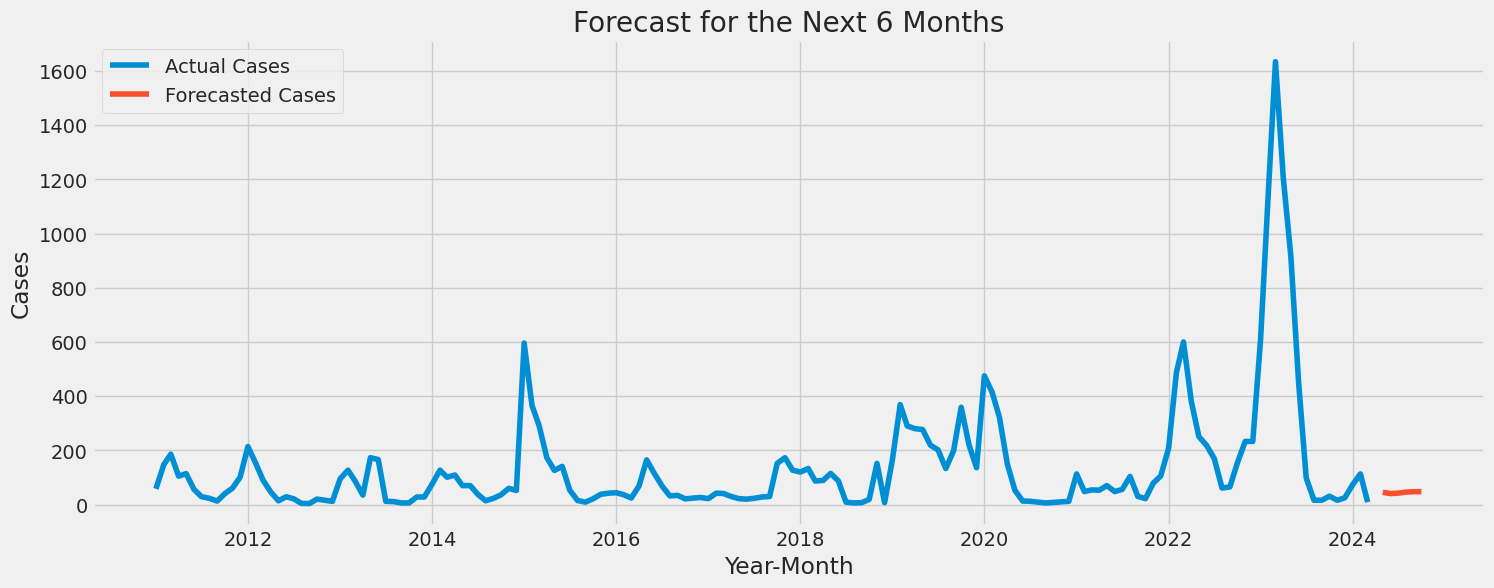

In [ ]:
# Get the last 30 data points from the original data to predict the next 6 months
last_30_days = scaled_data[-159:]
# Create an empty list to store the forecasted values
forecast = []

# Predict the next value, add it to the forecast list, then use this new value to predict the next one
for i in range(6):
    x_input = last_30_days.reshape((1, 159, 1))
    forecasted_value = model.predict(x_input)
    forecast.append(forecasted_value[0][0])
    last_30_days = np.append(last_30_days[1:], forecasted_value[0][0])
    last_30_days = last_30_days.reshape((159, 1))

# Inverse transform the forecasted values to bring them back to the original scale
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create date range for the next 6 months
current_date = df.index[-1]
date_range = pd.date_range(start=current_date, periods=7, freq='M')[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=date_range, columns=['Forecast'])

# Plot the original data along with the forecast
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Cases'], label='Actual Cases')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Cases', linestyle='-')
plt.title('Forecast for the Next 6 Months')
plt.xlabel('Year-Month')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [ ]:
#from keras.models import load_model


#model.save('/content/drive/MyDrive/Colab Notebooks/Measles/kamerun_lstm_model-0.4-b8-e50.h5')


#loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Measles/kamerun_lstm_model-0.4-b8-e50.h5')


#predictions_loaded_model = loaded_model.predict(x_test)
#predictions_loaded_model = scaler.inverse_transform(predictions_loaded_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
forecast_df = forecast_df.rename(columns = {'Forecast':'Cases'})
forecast_df.head()

NameError: name 'forecast_df' is not defined

In [ ]:
asd=valid["Cases"]

In [ ]:
forecast_df

NameError: name 'forecast_df' is not defined

In [ ]:
# Get the last 30 data points from the original data to predict the next 6 months
last_30_days = scaled_data[-159:]
# Create an empty list to store the forecasted values
forecast = []

# Predict the next value, add it to the forecast list, then use this new value to predict the next one
for i in range(6):
    x_input = last_30_days.reshape((1, 159, 1))
    forecasted_value = model.predict(x_input)
    forecast.append(forecasted_value[0][0])
    last_30_days = np.append(last_30_days[1:], forecasted_value[0][0])
    last_30_days = last_30_days.reshape((159, 1))

# Inverse transform the forecasted values to bring them back to the original scale
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create date range for the next 6 months
current_date = df.index[-1]
date_range = pd.date_range(start=current_date, periods=7, freq='M')[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=date_range, columns=['Forecast'])

# Plot the original data along with the forecast
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Cases'], label='Actual Cases')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Cases', linestyle='-')
plt.title('Forecast for the Next 6 Months')
plt.xlabel('Year-Month')
plt.ylabel('Cases')
plt.legend()
plt.show()

NameError: name 'model' is not defined

In [ ]:
asd.loc['2024-04-01'] = 45
asd.loc['2024-05-01'] = 41
asd.loc['2024-06-01'] = 42
asd.loc['2024-07-01'] = 46
asd.loc['2024-08-01'] = 47
asd.loc['2024-09-01'] = 48

<ipython-input-14-a398365e0864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd.loc['2024-04-01'] = 45
<ipython-input-14-a398365e0864>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd.loc['2024-05-01'] = 41
<ipython-input-14-a398365e0864>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd.loc['2024-06-01'] = 42
<ipython-input-14-a398365e0864>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
asd = asd.iloc[12:]

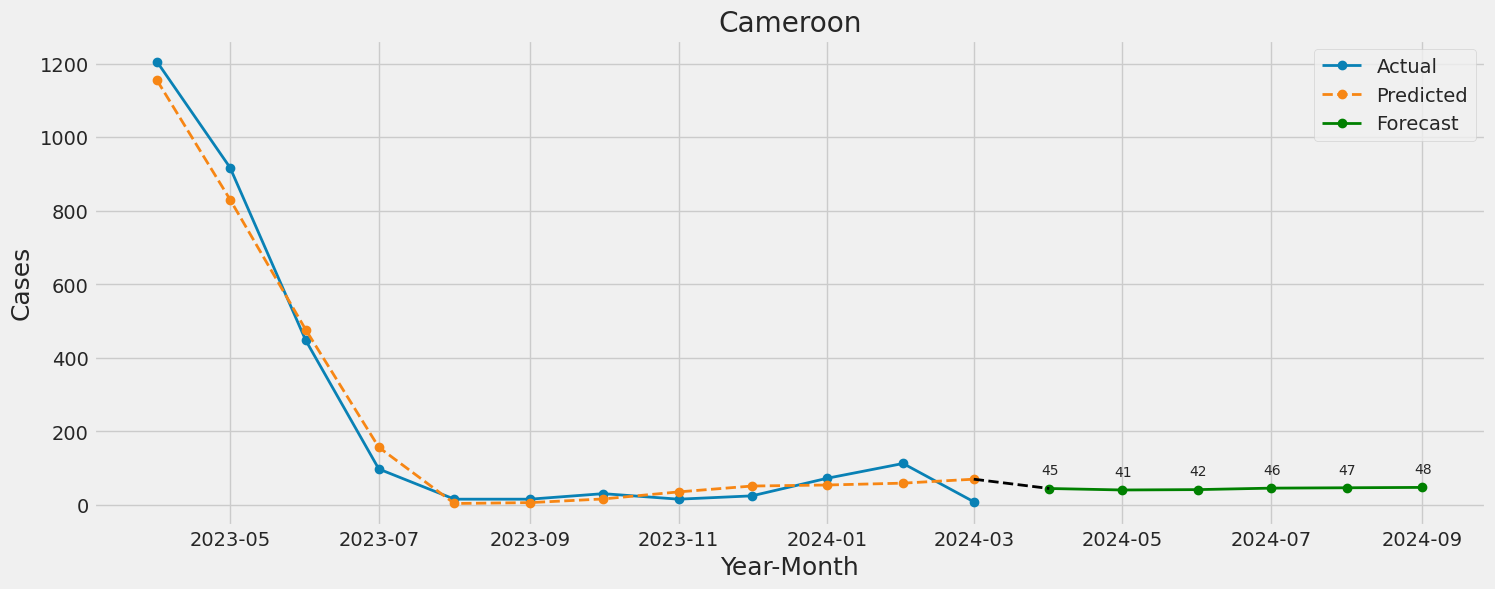

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'asd' contains your forecasted values

# Plot the data
plt.figure(figsize=(16, 6))
plt.title('Cameroon')
plt.xlabel('Year-Month', fontsize=18)
plt.ylabel('Cases', fontsize=18)

# Plot actual cases
plt.plot(valid['Cases'], color='#0981b5', marker='o', linewidth=2, label='Actual')

# Plot predicted cases
plt.plot(valid['Predictions'], color='#f78614', marker='o', linestyle='--', linewidth=2, label='Predicted')

# Plot forecasted cases
plt.plot(forecasting.index, forecasting.values, color='green', marker='o', linewidth=2, label='Forecast')

# Dashed line connecting predicted and forecasted values
plt.plot([valid.index[-1], forecasting.index[0]], [valid['Predictions'].iloc[-1], forecasting.iloc[0]], 'k--', linewidth=2)

# Annotate forecasted values
for i, txt in enumerate(forecasting.values):
    plt.annotate(txt, (forecasting.index[i], forecasting.values[i]), xytext=(-6, 10), textcoords='offset points', fontsize=10)

# Legend and display
plt.legend(loc='upper right')
plt.show()